# SOLAR POWER PLANT OUTPUT PREDICTION

Welcome to this Jupyter notebook on the generation of renewable energy from solar power using solar panels. In the face of environmental challenges and the increasing demand for energy, solar power has emerged as a viable solution for a sustainable future. Solar panels, also known as photovoltaic (PV) panels, harness the abundant energy from the sun and convert it into electricity.

Solar power is a clean, renewable energy source that offers numerous benefits. It reduces greenhouse gas emissions, mitigates climate change, and decreases reliance on fossil fuels. Solar panels are designed to capture sunlight and convert it into direct current (DC) electricity through the photovoltaic effect. This process involves the interaction of photons (particles of light) with semiconductor materials, such as silicon, within the solar panels.

Once the solar panels generate DC electricity, it goes through an inverter, which converts it into alternating current (AC) electricity suitable for powering homes, businesses, and the electricity grid. AC electricity can be used directly or stored in batteries for later use. The excess electricity generated by solar panels can be fed back into the grid, allowing for net metering or feed-in tariff programs, where owners are credited for the electricity they contribute.

In this data analysis, we will see the different factors that affect the solar power generation from the PV cells. Also, we will develop Machine Learning models based on multi variable linear regression and random forest regressors. 

The dataset used in this analysis has been acquired from Kaggle (Link: https://www.kaggle.com/code/pythonafroz/solar-power-generation-forecast-with-99-auc/notebook)

## Installation of requisite python libraries

For directly using the dataset from Kaggle, we will install 'opendatasets' and acquire our special API key from Kaggle. Moreover, other python libraries like pandas, numpy, seaborn and matplotlib are also imported as they are important for the preliminary exploratory data analysis (EDA). 

In [72]:
!pip install opendatasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od


#### Downloading the requisite data set

In [73]:
od.download("https://www.kaggle.com/datasets/pythonafroz/solar-power")

Skipping, found downloaded files in "./solar-power" (use force=True to force download)


#### Two different datasets
There are two dataset tables available for a single solar farm. One of the dataset speaks about the power generation from the solar plant while the second dataset speaks about the correspoding meteorological data 

In [74]:
df_solargen = pd.read_csv("./solar-power/Plant_2_Generation_Data.csv")
df_weatsens = pd.read_csv("./solar-power/Plant_2_Weather_Sensor_Data.csv")

In [75]:
df_solargen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


'df_solargen' contains 67698 unique entries with 7 columns. This dataset has no null entries, therefore it doesnot require data cleaning step. 

In [76]:
df_weatsens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


'df_weatsens' contains 3259 unique entries with 6 columns. This dataset has no null entries, therefore it doesnot require data cleaning step. 

In order to understand the data in the dataset, 'describe()' function can be used. 

In [86]:
df_solargen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


Here, the Plant ID is the same for all the entries. Therefore, the mean and other properties are irrelevant. 

Lets have a look at the distribution of the data in each of the columns. (Note: In this histplots, we are not including the entries with values= 0 because, they are really high in number and therefore, you will not be able to see the distribution of the other data. Therefore, it is recommended to see the histplots with zero to understand the problem)

<AxesSubplot:xlabel='TOTAL_YIELD', ylabel='Count'>

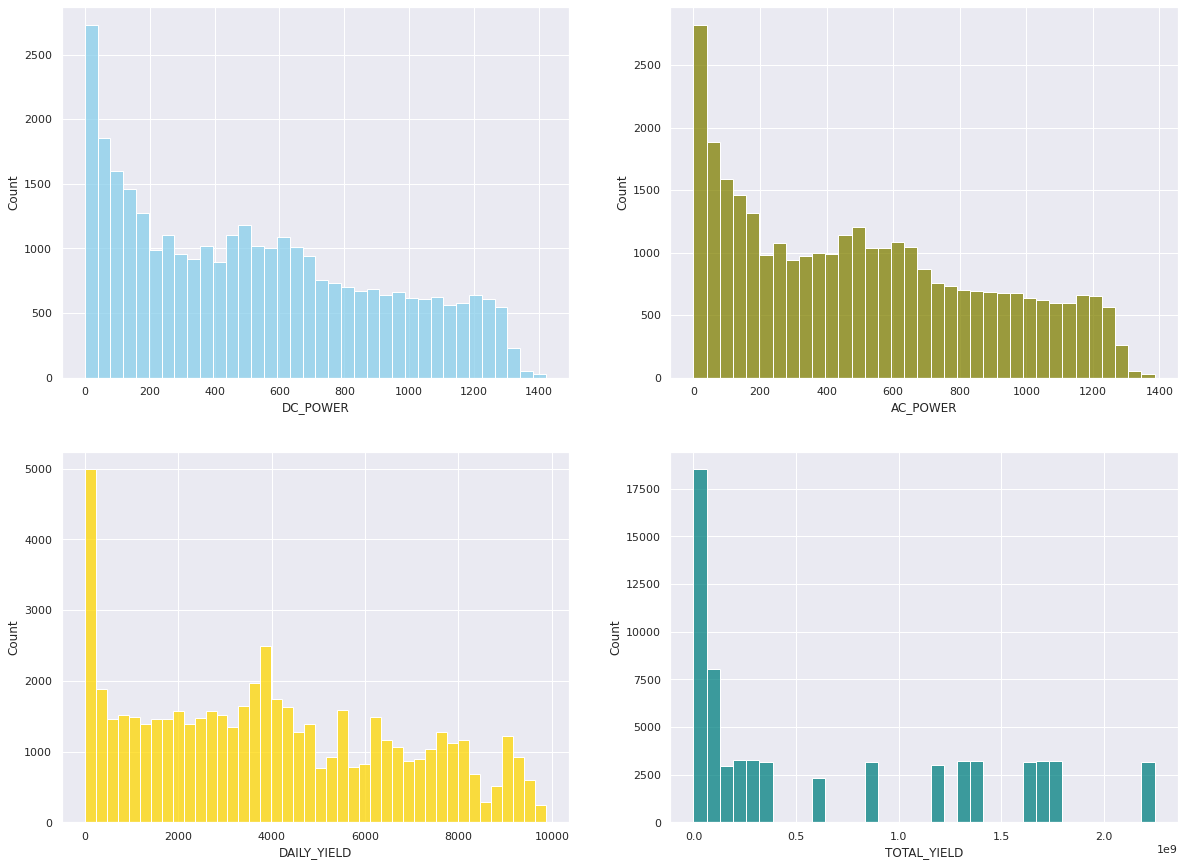

In [125]:
sns.set(style="darkgrid") # dark background for the hist plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15)) # providing the size of the figure

# Making the histplots from seaborn library
sns.histplot(data=df_solargen[(df_solargen['DC_POWER']!=0)], x="DC_POWER",  color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_solargen[(df_solargen['AC_POWER']!=0)], x="AC_POWER",  color="olive", ax=axs[0, 1])
sns.histplot(data=df_solargen[(df_solargen['DAILY_YIELD']!=0)], x="DAILY_YIELD",  color="gold", ax=axs[1, 0])
sns.histplot(data=df_solargen[(df_solargen['TOTAL_YIELD']!=0)], x="TOTAL_YIELD",  color="teal", ax=axs[1, 1])

Similar actions can be taken for the 'df_weatsens' dataset. 

In [78]:
df_weatsens.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


<AxesSubplot:xlabel='IRRADIATION', ylabel='Count'>

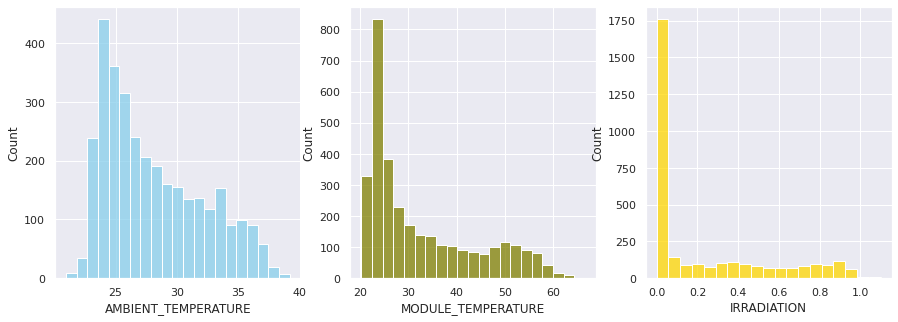

In [99]:
sns.set(style="darkgrid") # dark background for the hist plots
fig, axs = plt.subplots(figsize=(15, 5)) # providing the size of the figure

# Making the histplots from seaborn library
plt.subplot(1,3,1)
sns.histplot(data=df_weatsens[(df_weatsens['AMBIENT_TEMPERATURE']>=0)], x="AMBIENT_TEMPERATURE",  color="skyblue")
plt.subplot(1,3,2)
sns.histplot(data=df_weatsens[(df_weatsens['MODULE_TEMPERATURE']>=0)], x="MODULE_TEMPERATURE",  color="olive")
plt.subplot(1,3,3)
sns.histplot(data=df_weatsens[(df_weatsens['IRRADIATION']>=0)], x="IRRADIATION",  color="gold")

The following observations are made with this data visualization for df_weatsens dataset: 

    1- The ambianet temperature of the region varied from little less than 20 to little less than 40°C while the module temperature varied from 20 to little over than 60.
    
    2- High number of entries for IRRADIATION column is zero which can be attributed to the time of the when there is no sun light reaching the earth surface like at night or cloudy days. 

#### Transforming the format of date and time to visualize the daily variation of the features in the dataset

The change in the format for the date and time can be achieved by using the 'to_datetime()' function of pandas library

In [101]:
df_solargen['DATE_TIME'] = pd.to_datetime(df_solargen['DATE_TIME'],format='%Y-%m-%d %H:%M')
df_weatsens['DATE_TIME'] = pd.to_datetime(df_weatsens['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

# we create a new dataset 'df_tot' after dropping unnecessary columns from the parent dataset
df_tot = pd.merge(df_solargen.drop(columns = ['PLANT_ID','SOURCE_KEY']), df_weatsens.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')


Further, to derive the date, time, month, week and day from the 'DATE_TIME' column, '.dt.***' function has to be used

In [102]:
df_tot["DATE"] = pd.to_datetime(df_tot["DATE_TIME"]).dt.date
df_tot["TIME"] = pd.to_datetime(df_tot["DATE_TIME"]).dt.time
df_tot['DAY'] = pd.to_datetime(df_tot['DATE_TIME']).dt.day
df_tot['MONTH'] = pd.to_datetime(df_tot['DATE_TIME']).dt.month
df_tot['WEEK'] = pd.to_datetime(df_tot['DATE_TIME']).dt.week

/tmp/ipykernel_46/3804440363.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_tot['WEEK'] = pd.to_datetime(df_tot['DATE_TIME']).dt.week


#### Visualize the daily irradiation variation 

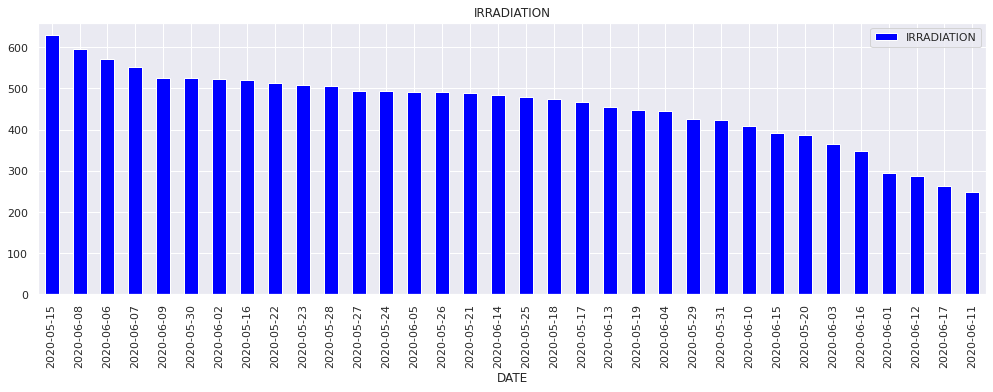

In [103]:
# Grouping the irradiation values based on the date and then summing up the irradiation recorded at different instances of the day
daily_irradiation = df_tot.groupby('DATE')['IRRADIATION'].agg('sum')

# Sorting the values in descending order to see the days with highest amount of irradiation
daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')

plt.title('IRRADIATION')
plt.show()

Here we can see that 15th May 2020 was the day with highest amount of irradiation while 11th June 2020 received the least amount of irradiation

#### Vizualise the daily DC_POWER generation

<AxesSubplot:xlabel='DATE'>

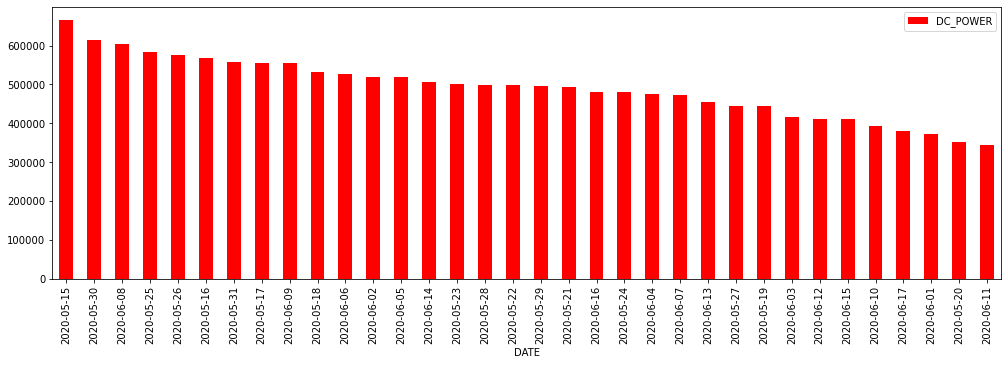

In [19]:
# Group the data according to date and sum the DC power generated in that entire day
daily_DC_Power = df_tot.groupby('DATE')['DC_POWER'].agg('sum')

# Plot the DC power generated in each day in descending order in the form of a bar plot
daily_DC_Power.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')

Here, we can see that 15th May 2020 generated the highest amount of DC power while 11th June 2020 generated the least. 
Note that the descending order of DC power generated and Irradiation is not the same. 

#### Visualize the variation of daily irradiation and DC power generation in a single plot

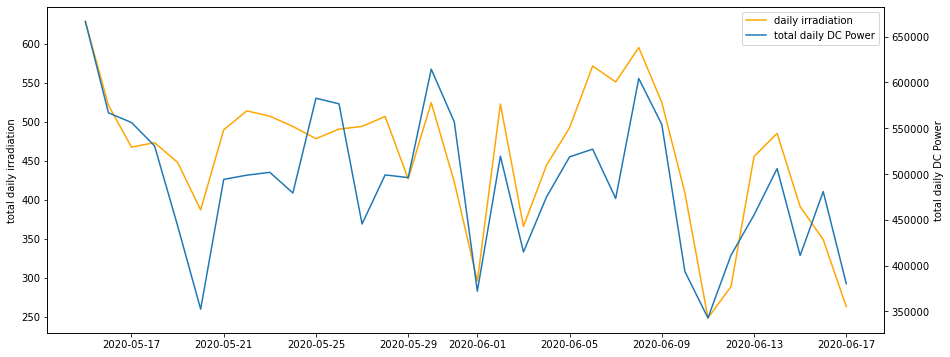

In [71]:
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)

ax1.plot(daily_irradiation.index,daily_irradiation.values, color='orange', label="daily irradiation")
ax1.set_ylabel('total daily irradiation')

ax2 = ax1.twinx()

ax2.plot(daily_DC_Power.index, daily_DC_Power.values, label="total daily DC Power")
ax2.set_ylabel('total daily DC Power')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

This plot shows that the daily variation of the irradiation follows the daily variation of DC power. This means that the amount of the irradiation affects the DC power generation from the solar panels. 

#### Correlation among different features of the dataset

In order to visualize the correlation between the different features of the dataset, 'heatmap' data visualization tool from seaborn library can be used

<AxesSubplot:>

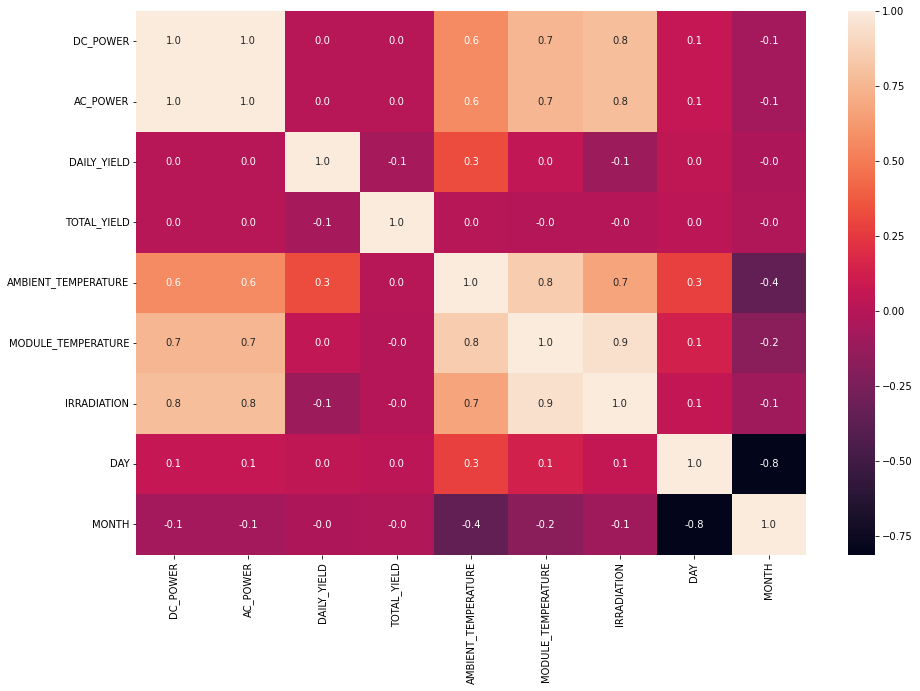

In [24]:
# For the correlation, we do not need the date and time features and therefore, can be dropped from the dataset
df_clean = df_tot.drop(columns=['DATE_TIME','DATE', 'TIME', 'WEEK']).corr()

fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(df_clean,annot=True, fmt=".1f")

The heatmap visualization shows that DC_POWER and AC_POWER are strongly corrrelated while AMBIANET_TEMPERATURE, MODULE_TEMPERATURE and IRRADIATION features can strongly influence the DC_POWER output of the solar power plant. 

## Developing the Machine Learning Model

#### Generating the X and Y dataset

In the X values we will include Ambient temperature, module temperature and irradiation features while our target value will the output AC power. 

In [104]:
X = df_tot[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
Y = df_tot[['AC_POWER']]

Now before trainign the ML models, it is important to split the dataset into training and testing datasets. This can be done by using the train_test_split feature of sklearn library. 

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=21)

#### Linear Regression

In this section we will develop the ML model using Linear Regression

LR Model score = 60.7055%
LR Model R2 Score = 61.0000%


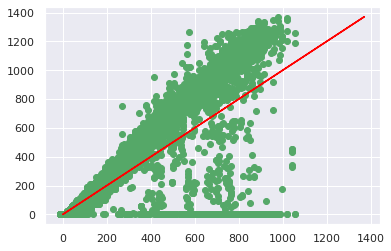

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler # for Feature Scaling
scaler = StandardScaler()

reg = LinearRegression().fit(scaler.fit_transform(X_train),Y_train)
score_reg = 100*reg.score(scaler.fit_transform(X_test),Y_test)
r2score_reg = 100*round(r2_score(Y_test, reg.predict(scaler.fit_transform(X_test))),2)

print(f'LR Model score = {score_reg:4.4f}%')
print (f'LR Model R2 Score = {r2score_reg:4.4f}%')

plt.scatter(reg.predict(scaler.fit_transform(X_test)), Y_test,color='g') 
plt.plot(Y_test,Y_test,color='red')


The linear regression model gives a R2 score of 61%. 

#### Random Forest Regressor

Another form of regression that can be used is the Random Forest Regressor that is generally better than the traditional Linear Regression model. 

/tmp/ipykernel_46/1896609482.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestRegressor().fit(scaler.fit_transform(X_train),Y_train)


RFR Model Score = 66.54967185232071%
R2 Score :  66.55 %


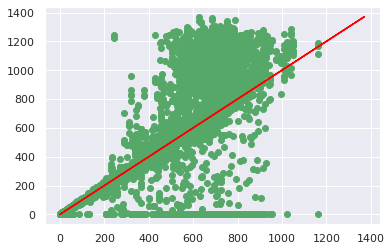

In [127]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor().fit(scaler.fit_transform(X_train),Y_train)
print(f'RFR Model Score = {100*rfr.score(scaler.fit_transform(X_test),Y_test)}%')

Y_pred_rfr = rfr.predict(scaler.fit_transform(X_test))
R2_Score_rfr = round(r2_score(Y_test, Y_pred_rfr) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

plt.scatter(Y_pred_rfr, Y_test,color='g') 
plt.plot(Y_test,Y_test,color='red')

The Random Forest Regressor improved the accuracy of the model from 61% to 66.6%

#### Decision Tree Regressor

Score for DTR: 38.74 %
R2 Score :  38.74 %


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


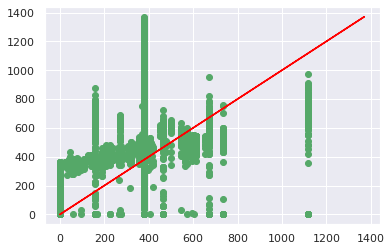

In [128]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train,Y_train)

print("Score for DTR:",round(dtr.score(scaler.fit_transform(X_test),Y_test)*100,2),"%")

Y_pred_dtr = dtr.predict(scaler.fit_transform(X_test))
R2_score_dtr = round(r2_score(Y_test, Y_pred_dtr)*100,2)
print("R2 Score : ",R2_score_dtr,"%")

plt.scatter(Y_pred_dtr, Y_test,color='g') 
plt.plot(Y_test,Y_test,color='red')

Decision Tree Regressor didnot improve the model accuracy. 